# EXCEL FILE 

In [1]:
#cleaning the data -excel
import pandas as pd
g2=pd.read_csv('poro_perm_data.csv')


In [2]:
g2.head() 

,Depth (ft),Porosity (%),Permeability (mD),Facies
0,2341.0,17.758524,71.140412,'crevasse splay'
1,3864.5,17.205288,82.554209,'crevasse splay'
2,903.5,13.324048,17.628365,'overbanks'
3,2040.5,35.584303,133.179677,'crevasse splay'
4,4069.0,22.947981,162.532854,'channel'


In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [4]:
import missingno as msno

g2.isnull().sum()

Depth (ft)           0
Porosity (%)         0
Permeability (mD)    0
Facies               2
dtype: int64

In [5]:
g2.dropna(axis = 0, inplace = True )

In [6]:
#g2['Facies'] = pd.to_numeric(g2['Facies'],errors = 'coerce')

In [7]:
g2['Facies'] = g2['Facies'].map(lambda x: x.rstrip("'"))
g2['Facies'] = g2['Facies'].map(lambda x: x.lstrip("'"))
g2.head()

,Depth (ft),Porosity (%),Permeability (mD),Facies
0,2341.0,17.758524,71.140412,crevasse splay
1,3864.5,17.205288,82.554209,crevasse splay
2,903.5,13.324048,17.628365,overbanks
3,2040.5,35.584303,133.179677,crevasse splay
4,4069.0,22.947981,162.532854,channel


In [8]:
g2.head()

,Depth (ft),Porosity (%),Permeability (mD),Facies
0,2341.0,17.758524,71.140412,crevasse splay
1,3864.5,17.205288,82.554209,crevasse splay
2,903.5,13.324048,17.628365,overbanks
3,2040.5,35.584303,133.179677,crevasse splay
4,4069.0,22.947981,162.532854,channel


In [9]:
g2.columns = g2.columns.str.replace(" ","")

In [10]:
g2.head()

,Depth(ft),Porosity(%),Permeability(mD),Facies
0,2341.0,17.758524,71.140412,crevasse splay
1,3864.5,17.205288,82.554209,crevasse splay
2,903.5,13.324048,17.628365,overbanks
3,2040.5,35.584303,133.179677,crevasse splay
4,4069.0,22.947981,162.532854,channel


In [11]:
# Dropping negative porosities 
ndrop = g2[(g2['Porosity(%)' ] <= 0)].index
g2.drop(ndrop, inplace=True)

In [12]:
nndrop = g2[(g2['Porosity(%)' ] > 100)].index
g2.drop(nndrop, inplace=True)

In [13]:
g2.head()

,Depth(ft),Porosity(%),Permeability(mD),Facies
0,2341.0,17.758524,71.140412,crevasse splay
1,3864.5,17.205288,82.554209,crevasse splay
2,903.5,13.324048,17.628365,overbanks
3,2040.5,35.584303,133.179677,crevasse splay
4,4069.0,22.947981,162.532854,channel


In [14]:
# Dropping negative permeability 
n2drop = g2[(g2['Permeability(mD)' ] <= 0)].index
g2.drop(n2drop, inplace=True)

In [15]:
g2.head()

,Depth(ft),Porosity(%),Permeability(mD),Facies
0,2341.0,17.758524,71.140412,crevasse splay
1,3864.5,17.205288,82.554209,crevasse splay
2,903.5,13.324048,17.628365,overbanks
3,2040.5,35.584303,133.179677,crevasse splay
4,4069.0,22.947981,162.532854,channel


In [16]:
# Dropping negative depth 
n3drop = g2[(g2['Depth(ft)' ] <= 0)].index
g2.drop(n3drop, inplace=True)

In [17]:
g2.head()

,Depth(ft),Porosity(%),Permeability(mD),Facies
0,2341.0,17.758524,71.140412,crevasse splay
1,3864.5,17.205288,82.554209,crevasse splay
2,903.5,13.324048,17.628365,overbanks
3,2040.5,35.584303,133.179677,crevasse splay
4,4069.0,22.947981,162.532854,channel


In [18]:
#to convert ft to m
g2['Depth(m)']= g2['Depth(ft)']*0.3048
g2.head()

,Depth(ft),Porosity(%),Permeability(mD),Facies,Depth(m)
0,2341.0,17.758524,71.140412,crevasse splay,713.5368
1,3864.5,17.205288,82.554209,crevasse splay,1177.8996
2,903.5,13.324048,17.628365,overbanks,275.3868
3,2040.5,35.584303,133.179677,crevasse splay,621.9444
4,4069.0,22.947981,162.532854,channel,1240.2312


In [19]:
g2['Porosity']= g2['Porosity(%)']/(100)
g2.head()

,Depth(ft),Porosity(%),Permeability(mD),Facies,Depth(m),Porosity
0,2341.0,17.758524,71.140412,crevasse splay,713.5368,0.177585
1,3864.5,17.205288,82.554209,crevasse splay,1177.8996,0.172053
2,903.5,13.324048,17.628365,overbanks,275.3868,0.133240
3,2040.5,35.584303,133.179677,crevasse splay,621.9444,0.355843
4,4069.0,22.947981,162.532854,channel,1240.2312,0.229480


In [20]:
g2.set_index('Facies',inplace=True)

In [21]:
#g2['Facies'] = pd.to_numeric(g2['Facies'],errors = 'coerce')

In [22]:
g2["Porosity"].describe()

count    146.000000
mean       0.222834
std        0.085760
min        0.023452
25%        0.160237
50%        0.220427
75%        0.287623
max        0.427979
Name: Porosity, dtype: float64

In [23]:
g2.head()

,Depth(ft),Porosity(%),Permeability(mD),Depth(m),Porosity
Facies,,,,,
crevasse splay,2341.0,17.758524,71.140412,713.5368,0.177585
crevasse splay,3864.5,17.205288,82.554209,1177.8996,0.172053
overbanks,903.5,13.324048,17.628365,275.3868,0.133240
crevasse splay,2040.5,35.584303,133.179677,621.9444,0.355843
channel,4069.0,22.947981,162.532854,1240.2312,0.229480


In [24]:
#Mean porosity for each Facies
#Mean porosity for crevasse splay
g2.loc['crevasse splay',["Porosity"]]
porosity1=g2.loc['crevasse splay',["Porosity"]]
porosity1=porosity1.mean()
print("Mean porosity for crevasse splay= ", porosity1.Porosity)

Mean porosity for crevasse splay=  0.1875885107832


In [25]:
#Mean porosity for overbanks
g2.loc['overbanks',["Porosity"]]
porosity2=g2.loc['overbanks',["Porosity"]]
porosity2=porosity2.mean()
print("Mean porosity for overbanks= ", porosity2.Porosity)

Mean porosity for overbanks=  0.14388245183533335


In [26]:
#Mean porosity for channel
g2.loc['channel',["Porosity"]]
porosity3=g2.loc['channel',["Porosity"]]
porosity3=porosity3.mean()
print("Mean porosity for channel= ", porosity3.Porosity)

Mean porosity for channel=  0.28542299478333333


In [27]:
#add a coloumn just to use it in the calculations "unit less"
g2['Permeability']= g2['Permeability(mD)']*1
g2.head()

,Depth(ft),Porosity(%),Permeability(mD),Depth(m),Porosity,Permeability
Facies,,,,,,
crevasse splay,2341.0,17.758524,71.140412,713.5368,0.177585,71.140412
crevasse splay,3864.5,17.205288,82.554209,1177.8996,0.172053,82.554209
overbanks,903.5,13.324048,17.628365,275.3868,0.133240,17.628365
crevasse splay,2040.5,35.584303,133.179677,621.9444,0.355843,133.179677
channel,4069.0,22.947981,162.532854,1240.2312,0.229480,162.532854


In [28]:
#Mean permeability for each Facies
#Mean permeability for crevasse splay
g2.loc['crevasse splay',["Permeability"]]
Perm1=g2.loc['crevasse splay',["Permeability"]]
Perm1=Perm1.mean()
a=Perm1.Permeability
print("Mean porosity for crevasse splay= ", a)

Mean porosity for crevasse splay=  85.1657235014


In [29]:
#Mean permeability for crevasse splay
g2.loc['overbanks',["Permeability"]]
Perm2=g2.loc['overbanks',["Permeability"]]
Perm2=Perm2.mean()
b=Perm2.Permeability
print("Mean porosity for overbanks= ", b)

Mean porosity for overbanks=  29.30642846066667


In [30]:
#Mean permeability for channel
g2.loc['channel',["Permeability"]]
Perm3=g2.loc['channel',["Permeability"]]
Perm3=Perm3.mean()
c=Perm3.Permeability
print("Mean porosity for channel= ", c)

Mean porosity for channel=  227.8281313505


In [31]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Porosity vs. Frequency')

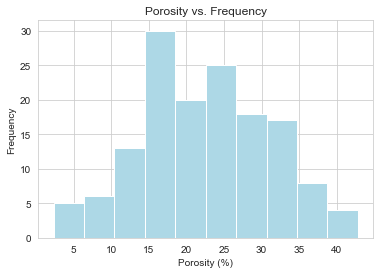

In [32]:
#HISTOGRAM 
import matplotlib.pyplot as plt 
phi=g2['Porosity(%)']

import seaborn as sb
sb.set_style('whitegrid')

plt.hist(phi, color='lightblue')
plt.ylabel('Frequency') 
plt.xlabel('Porosity (%)') 
plt.title('Porosity vs. Frequency')



Text(20, 35, 'Min = 2.34521916')

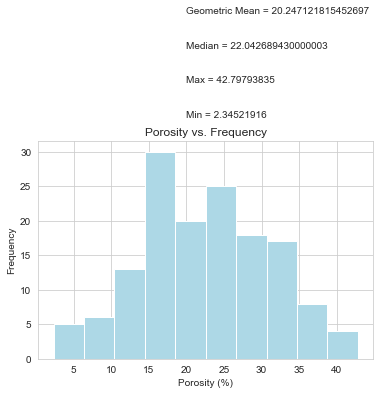

In [33]:
import matplotlib.pyplot as plt 
phi=g2['Porosity(%)']
import scipy.stats as stats
import seaborn as sb
sb.set_style('whitegrid')

plt.hist(phi, color='lightblue')
plt.ylabel('Frequency') 
plt.xlabel('Porosity (%)') 
plt.title('Porosity vs. Frequency')

y=stats.gmean(phi, axis=0, dtype=None)#arathmatic mean
plt.text(20, 50, 'Geometric Mean = ' + str(y))
plt.text(20, 45, 'Median = ' + str(g2['Porosity(%)'].median()))
plt.text(20, 40, 'Max = ' + str(g2['Porosity(%)'].max()))
plt.text(20, 35, 'Min = ' + str(g2['Porosity(%)'].min())) 

Text(0.5, 1.0, 'Permeability vs. Frequency')

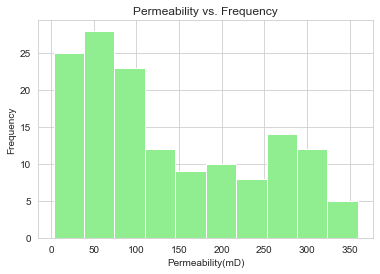

In [34]:
import matplotlib.pyplot as plt 
k=g2['Permeability(mD)']

import seaborn as sb
sb.set_style('whitegrid')

plt.hist(k, color='lightgreen')
plt.ylabel('Frequency') 
plt.xlabel('Permeability(mD)') 
plt.title('Permeability vs. Frequency')




Text(20, 35, 'Min = 2.786742383')

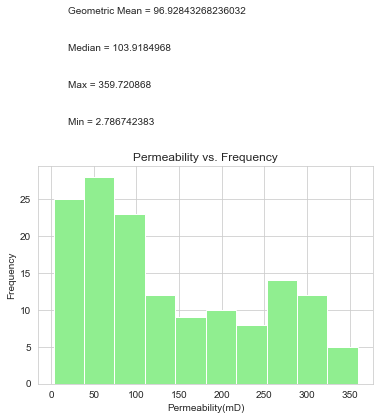

In [35]:
import matplotlib.pyplot as plt 
k=g2['Permeability(mD)']
import scipy.stats as stats
import seaborn as sb
sb.set_style('whitegrid')

plt.hist(k, color='lightgreen')
plt.ylabel('Frequency') 
plt.xlabel('Permeability(mD)') 
plt.title('Permeability vs. Frequency')

#geo mean - NEWWWWWW **log normal 
x=stats.gmean(k, axis=0, dtype=None)
plt.text(20, 50, 'Geometric Mean = ' + str(x))
plt.text(20, 45, 'Median = ' + str(g2['Permeability(mD)'].median()))
plt.text(20, 40, 'Max = ' + str(g2['Permeability(mD)'].max()))
plt.text(20, 35, 'Min = ' + str(g2['Permeability(mD)'].min())) 

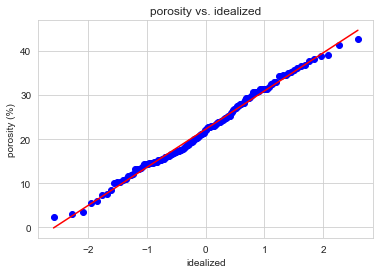

In [36]:
import pylab 
import scipy.stats as stats
stats.probplot(phi, dist="norm", plot=pylab)
plt.ylabel('porosity (%)') 
plt.xlabel('idealized') 
plt.title('porosity vs. idealized')
pylab.show()

# Perfecto 

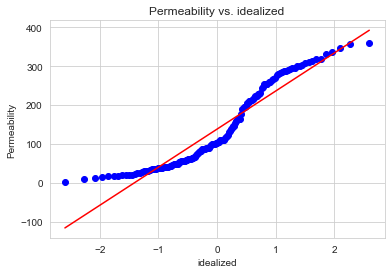

In [37]:
import pylab 
import scipy.stats as stats
stats.probplot(k, dist="norm", plot=pylab)
plt.ylabel('Permeability') 
plt.xlabel('idealized') 
plt.title('Permeability vs. idealized')
pylab.show()

#Poor

In [38]:
#for permeability 
from scipy.stats import anderson


r = anderson(g2['Permeability(mD)'])
print('Statistic: %.3f' % r.statistic)
p = 0



for i in range(len(r.critical_values)):
    slevel, cvalues = r.significance_level[i], r.critical_values[i]
    if r.statistic < r.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (slevel, cvalues))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (slevel, cvalues)) 

        

Statistic: 5.054
15.000: 0.561, data does not look normal (reject H0)
10.000: 0.639, data does not look normal (reject H0)
5.000: 0.767, data does not look normal (reject H0)
2.500: 0.895, data does not look normal (reject H0)
1.000: 1.064, data does not look normal (reject H0)


In [42]:
#for POROSITY 
from scipy.stats import anderson


r = anderson(g2['Porosity(%)'])
print('Statistic: %.3f' % r.statistic)
p = 0



for i in range(len(r.critical_values)):
    slevel, cvalues = r.significance_level[i], r.critical_values[i]
    if r.statistic < r.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (slevel, cvalues))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (slevel, cvalues)) 



Statistic: 0.426
15.000: 0.561, data looks normal (fail to reject H0)
10.000: 0.639, data looks normal (fail to reject H0)
5.000: 0.767, data looks normal (fail to reject H0)
2.500: 0.895, data looks normal (fail to reject H0)
1.000: 1.064, data looks normal (fail to reject H0)


In [39]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.
